# <center> Aggregated CEMS: Data Visualization</center>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ISO/RTO 

In [2]:
emissions_isorto = pd.read_csv(os.path.join(os.pardir, 'formatted_data', 'cems_isorto.csv'), parse_dates=['DATE_UTC'],
                              index_col=['DATE_UTC', 'isorto'])
diffs_isorto = pd.read_csv(os.path.join(os.pardir, 'formatted_data', 'cems_diffs_isorto.csv'), parse_dates=['DATE_UTC'],
                              index_col=['DATE_UTC', 'isorto'])

In [3]:
emissions_isorto.head()

gload_mwh         so2_kg        nox_kg  \
DATE_UTC            isorto                                           
2006-01-01 03:00:00 CAISO     2514.91       5.551512    718.588611   
                    ERCOT    17710.30   44127.953546  10068.080439   
                    ISONE     4550.00   14001.659746   3160.450341   
                    MISO     36537.00  123951.250153  57380.768734   
                    NYISO     5935.00   10856.093574   3726.122202   

                                pm25_kg        co2_kg  so2_dam_ap2  \
DATE_UTC            isorto                                           
2006-01-01 03:00:00 CAISO     70.034682  1.136695e+06       499.36   
                    ERCOT    782.537781  1.520782e+07    833587.32   
                    ISONE    228.973494  3.459118e+06    388440.65   
                    MISO    3372.823112  3.525581e+07   3893357.94   
                    NYISO    553.292132  3.849458e+06    354881.33   

                            nox_dam_ap2  pm25_dam_ap2  so2_dam_eas  \
DATE_UTC            isorto                                           
2006-01-01 03:00:00 CAISO      10054.94      17458.62       138.49   
                    ERCOT      89664.62      35242.08    757298.01   
                    ISONE       1631.24      17717.05    497104.83   
                    MISO      559888.28     189205.23   3320000.05   
                    NYISO      17074.63     122390.37    346545.95   

                            nox_dam_eas  pm25_dam_eas     co2_dam  
DATE_UTC            isorto                                         
2006-01-01 03:00:00 CAISO       7384.93       5675.11    45467.79  
                    ERCOT      32103.40      42088.00   608312.79  
                    ISONE      45598.34      28926.09   138364.73  
                    MISO      553499.55     276582.38  1410232.51  
                    NYISO      60452.59      74153.65   153978.32

In [4]:
emissions_isorto.tail()

gload_mwh        so2_kg        nox_kg  \
DATE_UTC            isorto                                          
2017-12-31 23:00:00 ISONE     7774.65   5861.109440   3745.309598   
                    MISO     50517.56  38100.917431  26813.639756   
                    NYISO     8174.00   7107.399726   3684.301020   
                    PJM      70809.45  46755.221913  33515.009778   
                    SPP      27701.95  27790.668759  14326.817172   

                                pm25_kg        co2_kg  so2_dam_ap2  \
DATE_UTC            isorto                                           
2017-12-31 23:00:00 ISONE    277.235736  4.932370e+06    178597.96   
                    MISO    7209.308476  4.182665e+07   1171218.10   
                    NYISO    365.686274  4.636124e+06    285732.35   
                    PJM     6794.724931  5.214231e+07   1929839.95   
                    SPP     2721.645718  2.228699e+07    325165.06   

                            nox_dam_ap2  pm25_dam_ap2  so2_dam_eas  \
DATE_UTC            isorto                                           
2017-12-31 23:00:00 ISONE       2639.74      40651.23    226884.06   
                    MISO      292383.94     460844.74    970653.30   
                    NYISO       4398.01     133458.82    246021.48   
                    PJM       242318.92     652522.14   1301842.19   
                    SPP       132437.21      91753.81    473016.86   

                            nox_dam_eas  pm25_dam_eas     co2_dam  
DATE_UTC            isorto                                         
2017-12-31 23:00:00 ISONE      58500.99      46176.62   197294.81  
                    MISO      250970.80     587496.34  1673065.88  
                    NYISO      65485.41      60924.27   185444.94  
                    PJM       285622.19     626162.93  2085692.34  
                    SPP        68772.39     128796.78   891479.56

/Users/priyadonti/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


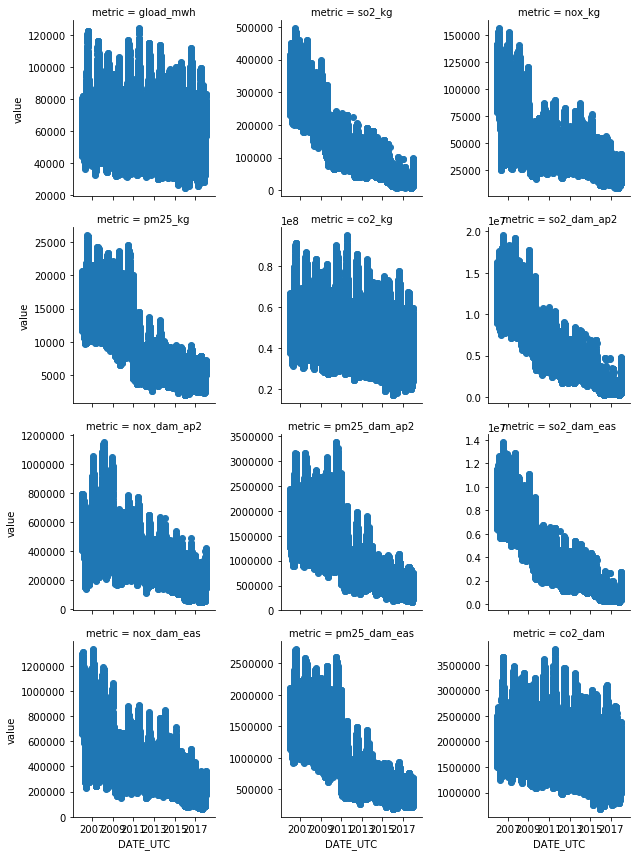

In [5]:
df = emissions_isorto[emissions_isorto.index.get_level_values('isorto') == 'PJM'].stack().reset_index().drop(
    'isorto', axis=1)
df.columns = ['DATE_UTC', 'metric', 'value']

g = sns.FacetGrid(df, col='metric', col_wrap=3, sharey=False);
g.map(plt.scatter, 'DATE_UTC', 'value');
plt.tight_layout()

In [6]:
diffs_isorto.head()

gload_mwh       so2_kg      nox_kg    pm25_kg  \
DATE_UTC            isorto                                                  
2006-01-01 04:00:00 CAISO     -457.19    -0.896751  -43.825605  -8.436821   
                    ERCOT     -445.70 -1853.107025 -138.292036 -20.593100   
                    ISONE     -142.25  -525.355244    4.911948 -13.607775   
                    MISO      -169.00  -211.712705 -208.724441 -30.753571   
                    NYISO       10.00  -180.070127    0.725747  -3.084429   

                                   co2_kg  so2_dam_ap2  nox_dam_ap2  \
DATE_UTC            isorto                                            
2006-01-01 04:00:00 CAISO  -189575.356635       -67.47      -599.11   
                    ERCOT  -341468.969925    -26896.37     -1389.72   
                    ISONE   -64021.859820     -9197.51        -2.10   
                    MISO   -161730.220245     -4707.34     -3325.18   
                    NYISO    10160.472000      1075.29       350.25   

                            pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            isorto                                           
2006-01-01 04:00:00 CAISO       -2143.44       -20.13      -439.39   
                    ERCOT       -1098.43    -32415.94      -570.31   
                    ISONE        -686.60    -19812.15      -119.35   
                    MISO        -1928.43      1374.61      1266.81   
                    NYISO         -51.44     -5182.87       501.45   

                            pm25_dam_eas   co2_dam  
DATE_UTC            isorto                          
2006-01-01 04:00:00 CAISO        -704.33  -7583.02  
                    ERCOT       -1110.50 -13658.76  
                    ISONE       -1604.94  -2560.88  
                    MISO        -3062.00  -6469.21  
                    NYISO        -369.88    406.42

In [7]:
diffs_isorto.tail()

gload_mwh      so2_kg      nox_kg    pm25_kg  \
DATE_UTC            isorto                                                 
2017-12-31 23:00:00 ISONE     -417.35   75.635105  -33.232418  -3.175147   
                    MISO      -821.50  433.453876 -275.726330 -97.250232   
                    NYISO      104.26 -235.423773 -413.961213   0.816466   
                    PJM      -1092.38  708.782406   25.156666 -67.585283   
                    SPP        518.63  312.951718  438.833931  46.084998   

                                   co2_kg  so2_dam_ap2  nox_dam_ap2  \
DATE_UTC            isorto                                            
2017-12-31 23:00:00 ISONE  -340682.440530      -851.95         6.15   
                    MISO   -570192.080865     13478.45     -2723.37   
                    NYISO     7762.782045    -21130.06      -806.98   
                    PJM    -622961.217945     15781.89      2616.89   
                    SPP     395693.231745      1531.24      3713.90   

                            pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            isorto                                           
2017-12-31 23:00:00 ISONE         587.26      2726.72      -849.75   
                    MISO       -13187.04      9966.70     -3382.00   
                    NYISO       -8623.81     -8388.21     -5194.34   
                    PJM         -7557.84     18888.37      1777.70   
                    SPP          1461.30      5974.07      2289.68   

                            pm25_dam_eas   co2_dam  
DATE_UTC            isorto                          
2017-12-31 23:00:00 ISONE        -448.64 -13627.30  
                    MISO        -9678.96 -22807.69  
                    NYISO        -807.84    310.51  
                    PJM         -8407.22 -24918.45  
                    SPP          2316.24  15827.73

### NERC regions

In [8]:
emissions_nerc = pd.read_csv(os.path.join(os.pardir, 'formatted_data', 'cems_nerc.csv'), parse_dates=['DATE_UTC'],
                              index_col=['DATE_UTC', 'nerc'])
diffs_nerc = pd.read_csv(os.path.join(os.pardir, 'formatted_data', 'cems_diffs_nerc.csv'), parse_dates=['DATE_UTC'],
                              index_col=['DATE_UTC', 'nerc'])

In [9]:
emissions_nerc.head()

gload_mwh         so2_kg         nox_kg  \
DATE_UTC            nerc                                            
2006-01-01 03:00:00 FRCC     9315.0   19517.716762   11495.363005   
                    MRO     16147.0   50395.023743   31830.676172   
                    NPCC    10485.0   24857.753320    6886.572543   
                    RFC     60160.0  313848.367398  106343.061364   
                    SERC    62686.0  235379.867087  102677.128098   

                               pm25_kg        co2_kg  so2_dam_ap2  \
DATE_UTC            nerc                                            
2006-01-01 03:00:00 FRCC    918.252657  8.188650e+06    656740.43   
                    MRO    1140.331545  1.629840e+07   1260223.07   
                    NPCC    782.265625  7.308576e+06    743321.98   
                    RFC   13902.337970  5.211802e+07  11560688.52   
                    SERC   6275.089363  5.589299e+07   6475459.94   

                          nox_dam_ap2  pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            nerc                                                        
2006-01-01 03:00:00 FRCC     47889.11     108330.88    351147.63     39613.06   
                    MRO     348216.22      41805.23   1200578.44    266871.66   
                    NPCC     18705.87     140107.41    843650.78    106050.94   
                    RFC     601479.30    1402520.48   8838024.74    953530.16   
                    SERC    490876.13     316644.80   5074511.84    495253.73   

                          pm25_dam_eas     co2_dam  
DATE_UTC            nerc                            
2006-01-01 03:00:00 FRCC      54032.00   327546.00  
                    MRO       74233.03   651935.84  
                    NPCC     103079.74   292343.05  
                    RFC     1354534.39  2084720.86  
                    SERC     427856.89  2235719.77

In [10]:
emissions_nerc.tail()

gload_mwh        so2_kg        nox_kg       pm25_kg  \
DATE_UTC            nerc                                                        
2017-12-31 23:00:00 RFC    85124.03  56035.303278  41287.977747  10426.458642   
                    SERC  111939.75  52168.008731  47460.928057   8890.140844   
                    SPP    26915.95  20558.473174  11851.157395   2473.621339   
                    TRE    42927.37  25538.545924  11767.593501   3035.531729   
                    WECC   52166.52  15337.408354  23800.255281   4276.742245   

                                co2_kg  so2_dam_ap2  nox_dam_ap2  \
DATE_UTC            nerc                                           
2017-12-31 23:00:00 RFC   6.425537e+07   2262108.54    317427.92   
                    SERC  7.683170e+07   1555891.48    362836.02   
                    SPP   2.050764e+07    265558.56    109692.39   
                    TRE   2.693264e+07    609045.92     94852.26   
                    WECC  3.629310e+07    194080.58    125236.89   

                          pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            nerc                                           
2017-12-31 23:00:00 RFC      911988.42   1599116.38    384894.62   
                    SERC     560381.81   1153302.88    234183.05   
                    SPP       86511.81    342899.41     51011.40   
                    TRE      187724.17    427445.19     36545.31   
                    WECC     153890.32    149302.46     41343.38   

                          pm25_dam_eas     co2_dam  
DATE_UTC            nerc                            
2017-12-31 23:00:00 RFC      958568.57  2570214.95  
                    SERC     588342.20  3073268.16  
                    SPP      119762.85   820305.45  
                    TRE      162971.59  1077305.48  
                    WECC     105929.73  1451723.92

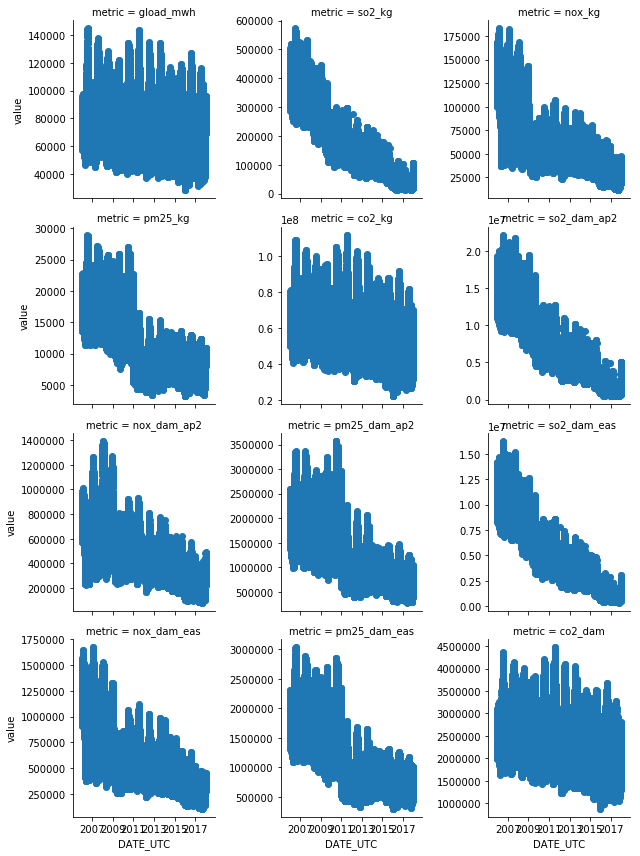

In [11]:
df = emissions_nerc[emissions_nerc.index.get_level_values('nerc') == 'RFC'].stack().reset_index().drop(
    'nerc', axis=1)
df.columns = ['DATE_UTC', 'metric', 'value']

g = sns.FacetGrid(df, col='metric', col_wrap=3, sharey=False);
g.map(plt.scatter, 'DATE_UTC', 'value');
plt.tight_layout()

In [12]:
diffs_nerc.head()

gload_mwh       so2_kg       nox_kg     pm25_kg  \
DATE_UTC            nerc                                                    
2006-01-01 04:00:00 FRCC     -77.00  -310.294576   -35.400588   -9.434724   
                    MRO       19.00   323.773970    83.576594   11.158376   
                    NPCC    -132.25  -705.425371     5.637695  -16.601485   
                    RFC     -532.00 -4516.135678  -583.055321 -171.820839   
                    SERC    -674.00 -3316.435186 -1318.119755   80.830184   

                                 co2_kg  so2_dam_ap2  nox_dam_ap2  \
DATE_UTC            nerc                                            
2006-01-01 04:00:00 FRCC  -63828.629415     -9269.14         6.69   
                    MRO    77110.725000      1889.22       691.73   
                    NPCC  -53861.387820     -8122.22       348.15   
                    RFC  -568150.914615   -159653.17     -2024.75   
                    SERC -586124.063835    -77469.59     -6795.54   

                          pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            nerc                                           
2006-01-01 04:00:00 FRCC       -746.87     -5640.23       -96.05   
                    MRO         340.58      7062.34       207.99   
                    NPCC       -738.03    -24995.02       382.08   
                    RFC      -14475.86   -118499.04      -823.23   
                    SERC       6345.48    -71826.26     -6113.16   

                          pm25_dam_eas   co2_dam  
DATE_UTC            nerc                          
2006-01-01 04:00:00 FRCC       -479.12  -2553.14  
                    MRO         745.23   3084.42  
                    NPCC      -1974.82  -2154.45  
                    RFC      -18799.52 -22726.04  
                    SERC       6560.65 -23444.97

In [13]:
diffs_nerc.tail()

gload_mwh       so2_kg       nox_kg     pm25_kg  \
DATE_UTC            nerc                                                    
2017-12-31 23:00:00 RFC    -2017.56   884.345189  -362.574229 -169.190002   
                    SERC     166.46   543.831860  1117.945976   19.413759   
                    SPP      485.63   140.061952   321.807195   41.186199   
                    TRE     -930.12 -1723.976186   148.720570  -55.338285   
                    WECC   -1075.19  -518.672927  -507.417495  -74.117015   

                                co2_kg  so2_dam_ap2  nox_dam_ap2  \
DATE_UTC            nerc                                           
2017-12-31 23:00:00 RFC  -1.155717e+06     21013.62     -1365.68   
                    SERC  5.945690e+04     27381.52      4191.52   
                    SPP   3.535091e+05       -88.37      2737.55   
                    TRE  -5.131964e+05    -23248.64       674.92   
                    WECC -6.892075e+05     -9308.56     -3851.35   

                          pm25_dam_ap2  so2_dam_eas  nox_dam_eas  \
DATE_UTC            nerc                                           
2017-12-31 23:00:00 RFC      -20724.25     23172.18     -2207.93   
                    SERC       1387.44     13273.36      2578.94   
                    SPP        1317.01      2638.21      1512.82   
                    TRE       -2910.98    -29793.70       472.66   
                    WECC      -5615.46     -4570.84        15.69   

                          pm25_dam_eas   co2_dam  
DATE_UTC            nerc                          
2017-12-31 23:00:00 RFC      -18366.10 -46228.70  
                    SERC       1453.49   2378.28  
                    SPP        2102.75  14140.36  
                    TRE       -3266.37 -20527.86  
                    WECC      -2150.52 -27568.30